## Pray - Predator dynamics

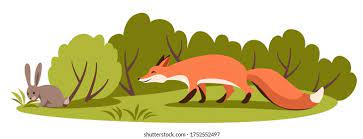
<br>
The [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations


$$
\begin{aligned}
\frac{dx}{dt} &= \alpha \cdot x - \beta \cdot x y
\\
\frac{dy}{dt} &= \delta \cdot x y - \gamma \cdot y
\end{aligned}
$$

The population dynamics for $\alpha = \frac{2}{3}$, $\beta = \frac{4}{3}$, $\delta = \gamma = 1$, and initial conditions $x = y = \frac{3}{2}$.

In [28]:
# Importing Libraries
from matplotlib import pyplot as plt
import numpy as np
from  Numerical_Methods import RungeKutta, Integrators
import panel as pn
import holoviews as hv
from bokeh.plotting import figure, show

In [38]:
def Lotka_Volterra_eq(t, v):
    α, β, γ, δ = 1/3, 1/3, 1, 1
    return np.array([
        (α * v[0]) - (β * v[0] * v[1]), # Pray
        (δ * v[0] * v[1]) - γ * v[1]    # Predator
    ])

In [39]:
def model(t):
    return RungeKutta.SSPRK4(Lotka_Volterra_eq, np.array([3/2, 3/2]), t, steps = 200)

In [40]:
ts = np.linspace(0, 72, 289)
ys = [model(t) for t in ts]

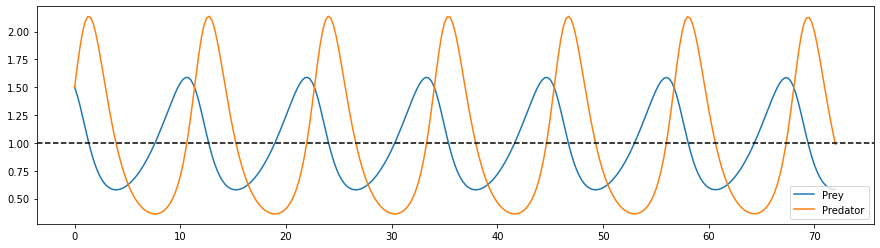

In [42]:
plt.figure(figsize=(15, 4))
plt.plot(ts, ys)

plt.legend(['Prey', 'Predator'])
plt.axhline(1, color = 'black', ls = '--')
plt.show()

In [35]:
# Helper functions 
def prey(t):
     return model(t)[0]
    
def predator(t):
     return model(t)[1]

We will compute the *average* population sizes $\bar{\boldsymbol{p}}$ in the interval $20 \leq t \leq 40$ by means of *Romberg integration* of the function `model(t)` that was defined above.

$$
\bar{p}_i = \frac{1}{40-20} \int_{20}^{40} model(t) \text{d}t
$$

In [71]:
period = 40 - 20
avg_prey =(1/period)*Integrators.romberg(prey, 20, 40, tol = 1e-3)
print(f'Average population size of the prey: {avg_prey:.2f}')

avg_predator = (1/period)*Integrators.romberg(predator, 20, 40, tol = 1e-3)
print(f'Average population size of the predator: {avg_predator:.2f}')


Average population size of the prey: 1.01
Average population size of the predator: 1.08


In [63]:
section = np.arange(20, 40, 1/20.)
prey_list = []
predator_list = []
for t in section:
    prey_list.append(prey(t))
    predator_list.append(predator(t))

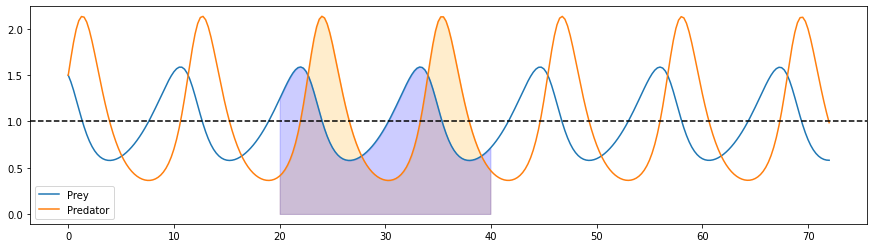

In [62]:
plt.figure(figsize=(15, 4))
plt.plot(ts, ys)
plt.fill_between(section, predator_list,
        color= "orange",
        alpha= 0.2)
plt.fill_between(section, prey_list,
        color= "b",
        alpha= 0.2)

plt.legend(['Prey', 'Predator'])
plt.axhline(1, color = 'black', ls = '--')
plt.show()

### Interactive plot 

In [104]:
def interaction(α, β, γ, δ):
    
    def Lotka_Volterra_eq(t, v):
        return np.array([
            (α * v[0]) - (β * v[0] * v[1]), # Pray
            (δ * v[0] * v[1]) - γ * v[1]    # Predator
        ])
    
    def model(t):
        return RungeKutta.SSPRK4(Lotka_Volterra_eq, np.array([3/2, 3/2]), t, steps = 200)
    
    ts = np.linspace(0, 72, 289)
    predator_line = [model(t)[1] for t in ts]
    prey_line = [model(t)[0]for t in ts]

    # create a new plot with a title and axis labels
    p = figure(title="Pray - Predator dynamics", 
               x_axis_label="Time (days)", 
               y_axis_label="Pray, Predator population", 
               tools="pan,wheel_zoom,box_zoom,reset,box_select",
               plot_width=800, plot_height=300)

    # add a line renderer with legend and line thickness
    p.line(ts, predator_line, legend_label="Predator",color="blue",  line_width=2)
    p.line(ts,prey_line, legend_label="Pray",color="red",  line_width = 2)


    return     p

In [106]:
pn.extension()


alpha = pn.widgets.FloatSlider(name='α', start=0, end=2, step=0.01, value=1.1, width=150, height=50)
beta = pn.widgets.FloatSlider(name='β', start=0.1, end=2, step=0.01, value=0.7, width=150, height=50)
gamma = pn.widgets.FloatSlider(name='γ', start=0, end=2, step=0.01, value=1, width=150, height=50)
delta = pn.widgets.FloatSlider(name='δ', start=0, end=2, step=0.01, value=0.4, width=150, height=50)

menu, plot = pn.interact(interaction,
                         α=alpha, 
                         β=beta, 
                         γ=gamma, 
                         δ=delta)

row = pn.Row(menu, plot)

row


Row
    [0] Column
        [0] FloatSlider(end=2, height=50, name='α', sizing_mode='fixed', step=0.01, value=1.1, width=150)
        [1] FloatSlider(end=2, height=50, name='β', sizing_mode='fixed', start=0.1, step=0.01, value=0.7, width=150)
        [2] FloatSlider(end=2, height=50, name='γ', sizing_mode='fixed', step=0.01, value=1, width=150)
        [3] FloatSlider(end=2, height=50, name='δ', sizing_mode='fixed', step=0.01, value=0.4, width=150)
    [1] Row
        [0] Bokeh(Figure, name='interactive01990')

### Pray dynamics
Accordind to the prey equation the prey are assumed to have an unlimited food supply and to reproduce exponentially,unless subject to predation<br>

 - This exponential growth is represented in the equation above by the term 𝜶𝒙. <br>
 -  The rate of predation upon the prey is assumed to be proportional to the rate at which the predators and the prey meet, this is represented above by 𝜷𝒙𝒚.

### Predator dynamics
 - In this equation, 𝜹𝒙𝒚 representsthe growth of the predator population.
 
Note the similarity to the predation rate; however, a different constant is used, as the rate at which the predator population grows is not necessarily equal to the rate at which it consumes the prey.
 - 𝜸𝒚 represents the loss rate of the predators due to either natural death or emigration, it leads to an exponential decay in the absenceof prey.